# 1.Preprocessing phase.

In [87]:
# importing libraries and creating a dataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("titanic-passengers.csv", encoding="ISO-8859-1")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,Mr


In [88]:
df.shape #Get namber of columns & 

(891, 13)

In [89]:
print(df['Cabin'].head())  #we use isnull() function directly on a column which indicates the position of the missing values
print(df['Cabin'].head().isnull())

0      G6
1     C85
2      G6
3    C123
4      G6
Name: Cabin, dtype: object
0    False
1    False
2    False
3    False
4    False
Name: Cabin, dtype: bool


In [90]:
df.isnull().sum() #We can get a summary on the number of missing values on each column: By using the isnull().sum() command

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Title            0
dtype: int64

In [91]:
number_of_elements = len(df["Cabin"])  #replace the missing values with the most frequent value by using the fillna() function.
print("Number of elements : ", number_of_elements) #Number of elements per category
print(df["Cabin"]. value_counts()) # Replace and display the value
df["Cabin"].fillna('G6' ,inplace=True)
df.tail()

Number of elements :  891
G6             691
C23 C25 C27      4
B96 B98          4
E101             3
F33              3
              ... 
B94              1
E10              1
C95              1
D19              1
F E69            1
Name: Cabin, Length: 147, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,G6,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,G6,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,G6,Q,Mr


# 2. Visualization phase:

<AxesSubplot:xlabel='Age', ylabel='Sex'>

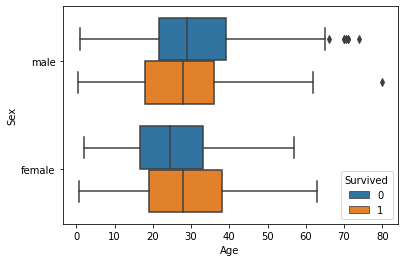

In [92]:
sns.boxplot(data=df, x='Age', y='Sex', hue ='Survived') #Visualize the correlation between Sex and Age

In [117]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

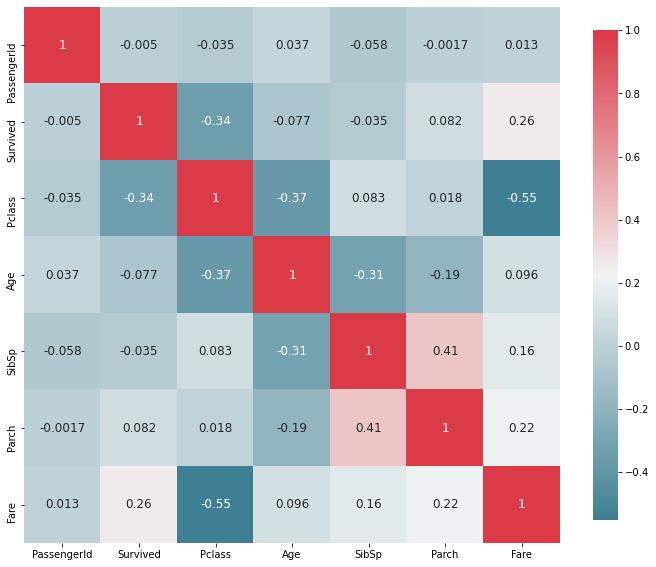

In [118]:
plot_correlation_map(df)

# My analysis description.
The heatmap shows us the correlation between the variables in the data set. The variation in colors represents different levels of correlation.
The correlation between variables range from -1 to 1. A value of -1 represents a perfect negative correlation, and a value of 1 represents a perfect positive correlation.
A value of zero indicates that there is no correlation whatsoever between the variables.
You’ll notice that the diagonal in the heatmap seems to have a correlation of 1, and that is because every variable is perfectly correlated with itself.
We can observe some strong relationships here.
The variables ‘SibSp’ and ‘Parch’ seem to have a positive correlation.
The variables ‘Fare’ and ‘Survived’ also seem to have a positive correlation.

In [95]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G6,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,G6,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [106]:
data1 = df.groupby(['Pclass','Survived'])
mean_data1=data1.mean()
mean_data1

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

In [ ]:
data = df.groupby(['Sex','Pclass','Title','age'])
plot_fonction(data)

In [125]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = df[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,Mr


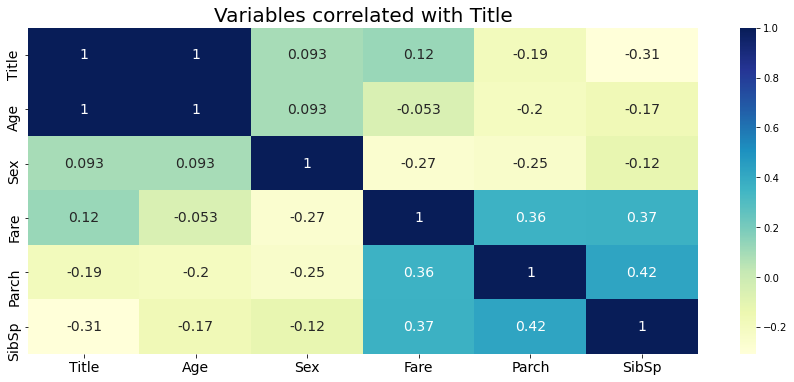

In [124]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Title and if our 
boxplot interpretation holds true. We need to convert categorical variable into numerical to plot 
correlation heatmap. So convert categorical variables into numerical."""
from sklearn.preprocessing import LabelEncoder
toSearch = toSearch.agg(LabelEncoder().fit_transform)
toSearch["Title"] = df.Age # Inserting Title in dataframe "toSearch".
toSearch = toSearch.set_index("Title").reset_index() # Move Title column at index 0.

# Now create the correlation heatmap
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(toSearch.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("Variables correlated with Title", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.tick_params(axis = "both", which = "minor", labelsize = 14)
plt.show()

In [128]:
df["familySize"] = df.SibSp + df.Parch + 1  # Adding 1 for single person
#bold("Categoiries in Family_size:")
display(df.familySize.value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: familySize, dtype: int64

We see there are several family sizes with the very least frequency. So its sensible to put them in a fewer buckets. We will create 4 buckets namely single, small, medium, and large for rest of them.

In [129]:
"""Create buckets of single, small, medium, and large and then put respective values into them."""
df.familySize.replace(to_replace = [1], value = "single", inplace = True)
df.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
df.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
df.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

After creating this 4 buckets we can see in the chart a distribution with any Buckets 

<AxesSubplot:>

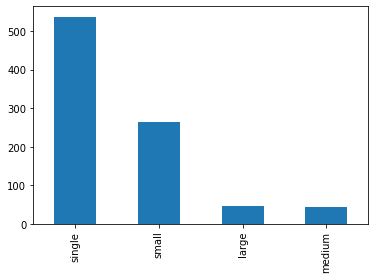

In [132]:
"""After processing, visualise and count the absolute and relative frequency of engineered familySize."""
df['familySize'].value_counts().plot.bar()

we have more single family than other like smal, large and medium

Use what you have learned so far to conclude if this feature is useful or not:
    this feature is very useful because we can split the family size into different categorie in order to have more insight about the famaily passenger details.